# Dealing with Missing Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## 1. The Problem With Missing Data

In [2]:
diabetes = pd.read_csv('data/pima-indians-diabetes.csv')
diabetes.describe()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.419815,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,7.023306,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [3]:
# Replacing hidden missing values

# BMI = 0인 값을 np.nan 으로 변경
zero_bmi = diabetes.BMI[diabetes.BMI == 0]
print(zero_bmi, '\n')

diabetes.BMI[diabetes.BMI == 0] = np.nan
print(diabetes[np.isnan(diabetes.BMI)].BMI)

549    0.0
Name: BMI, dtype: float64 

9     NaN
49    NaN
60    NaN
81    NaN
145   NaN
371   NaN
426   NaN
494   NaN
522   NaN
549   NaN
684   NaN
706   NaN
Name: BMI, dtype: float64


In [4]:
# Analyzing missingness percentage

airquality = pd.read_csv('data/airquality_missing.csv', parse_dates=['Date'], index_col='Date')

airquality_nullity = airquality.isnull()
print(airquality_nullity.head(), '\n')

# Calculate total of missing values
missing_values_sum = airquality_nullity.sum()
print('Total Missing Values:\n', missing_values_sum, '\n')

# Calculate percentage of missing values
missing_values_percent = airquality_nullity.mean() * 100
print('Percentage of Missing Values:\n', missing_values_percent)

            Ozone  Solar   Wind   Temp
Date                                  
1976-05-01  False  False  False  False
1976-05-02  False  False  False  False
1976-05-03  False  False  False  False
1976-05-04  False  False  False  False
1976-05-05   True   True  False  False 

Total Missing Values:
 Ozone    37
Solar     7
Wind      0
Temp      0
dtype: int64 

Percentage of Missing Values:
 Ozone    24.183007
Solar     4.575163
Wind      0.000000
Temp      0.000000
dtype: float64


In [5]:
# Visualize missingness

import missingno as msno

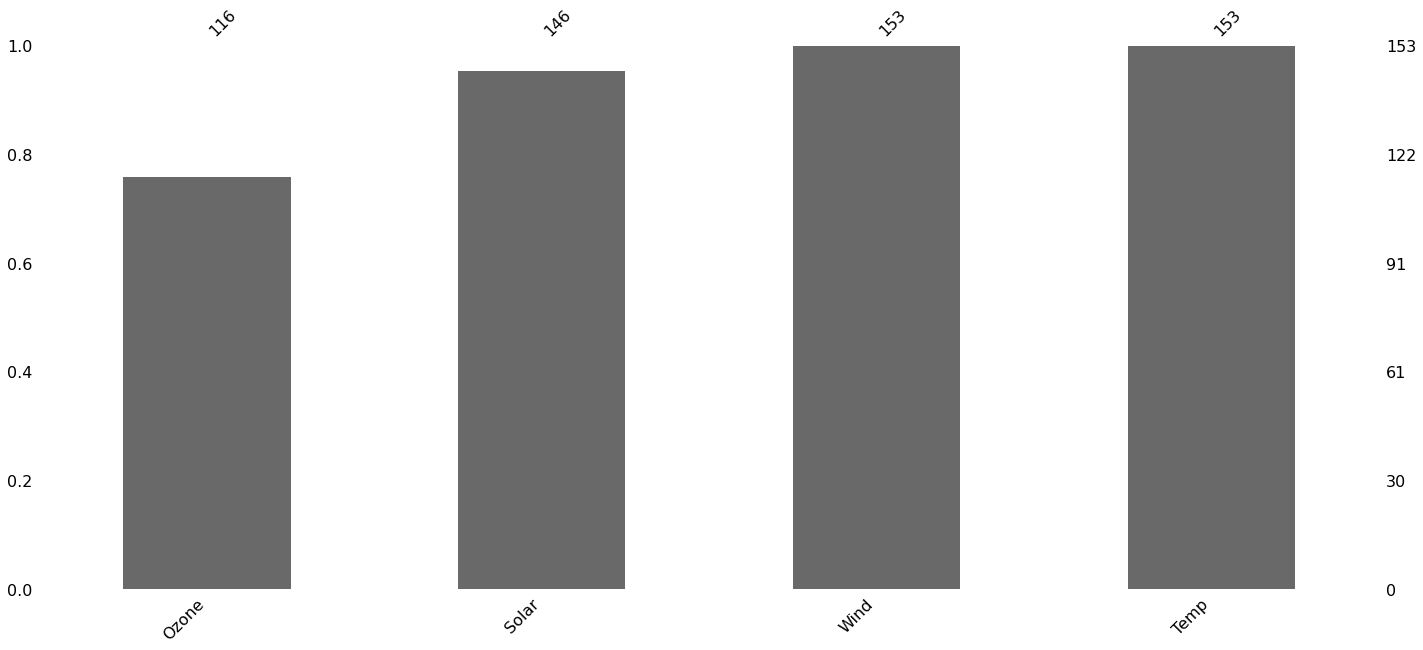

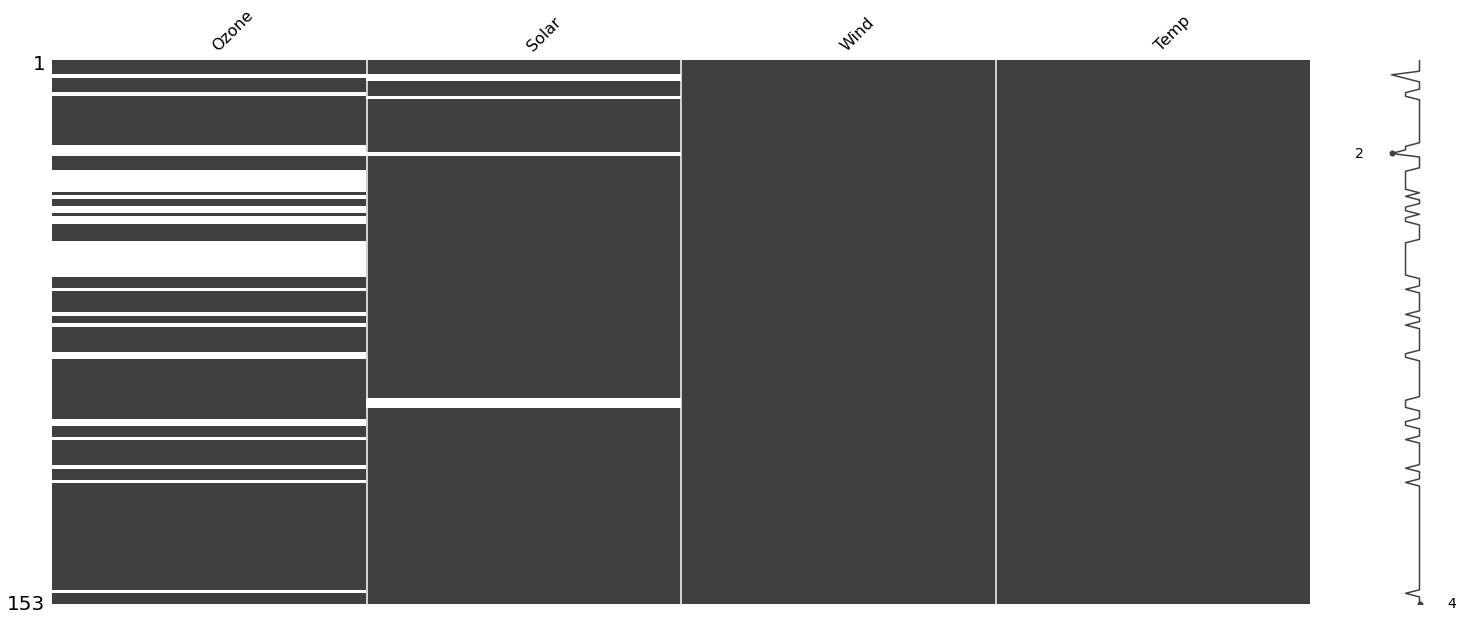

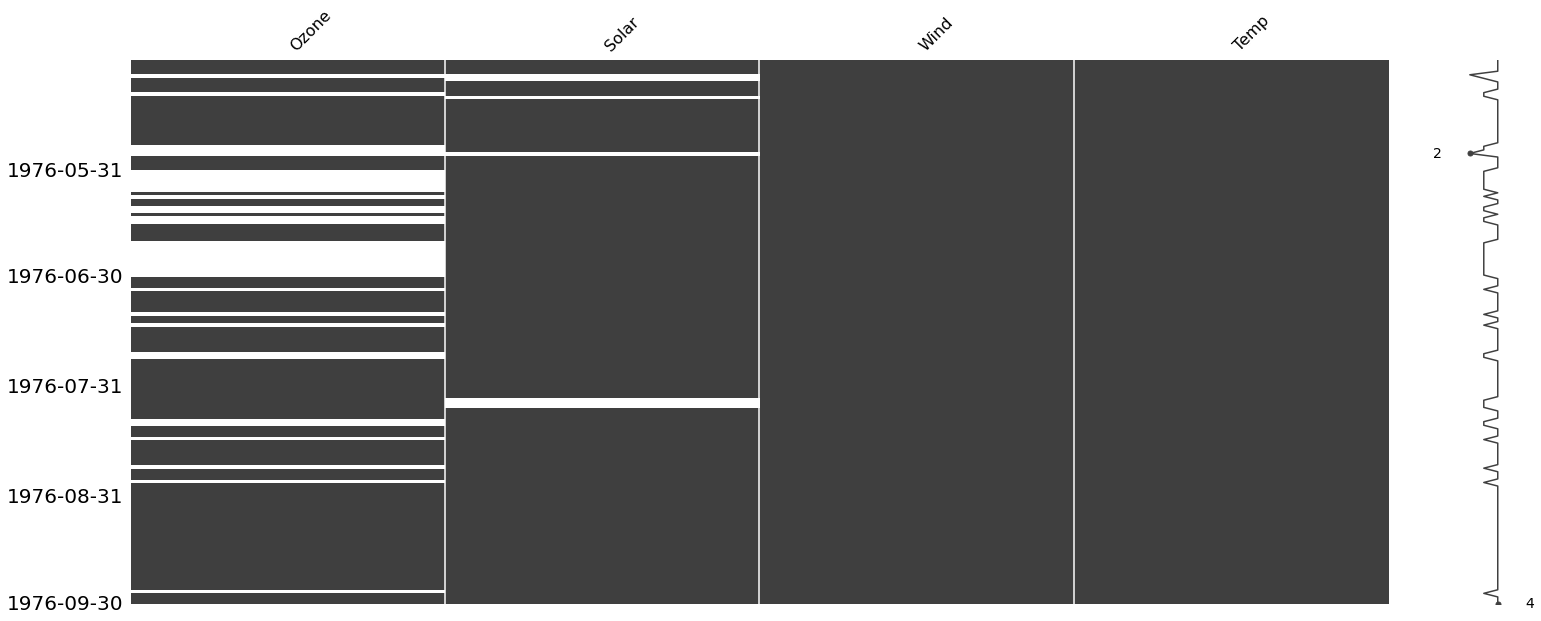

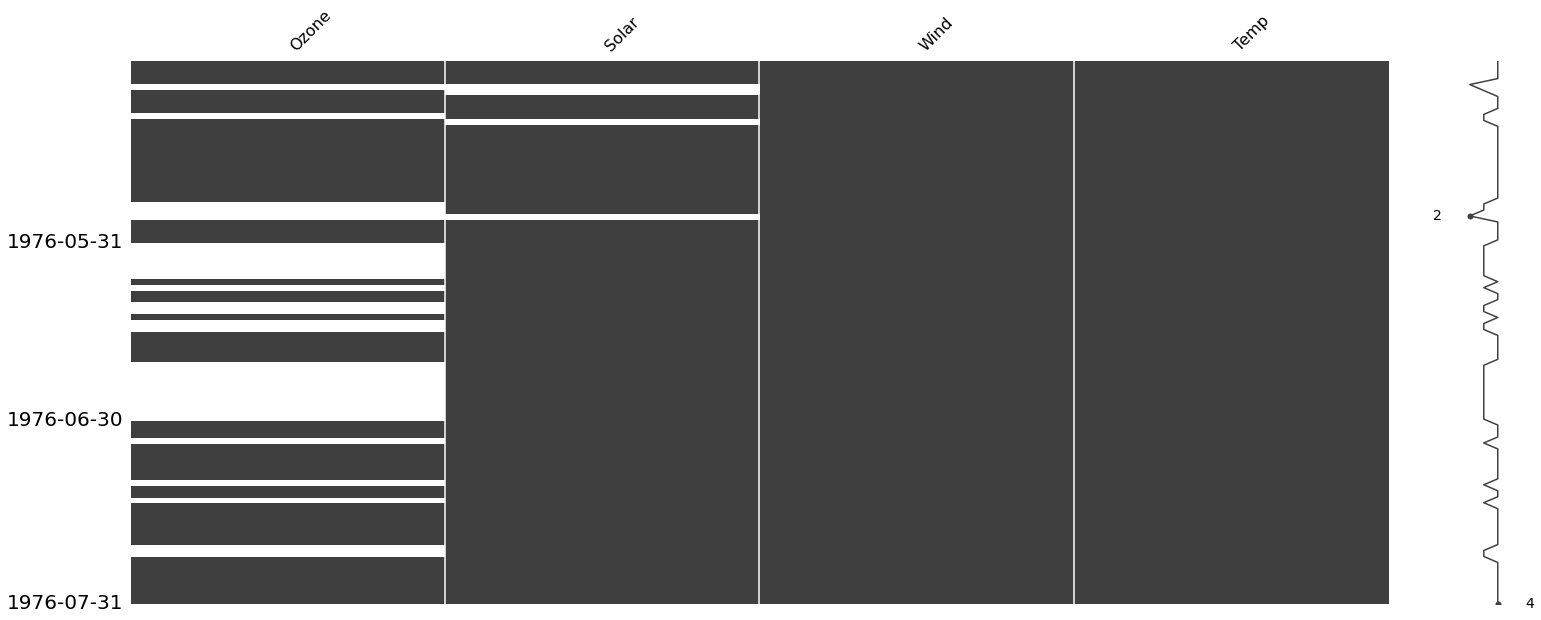

In [6]:
# Plot amount of missingness
msno.bar(airquality)
plt.show()

# Plot nullity matrix of airquality
msno.matrix(airquality)
plt.show()

# Plot nullity matrix of airquality with frequency 'M'
msno.matrix(airquality, freq='M')
plt.show()

# Plot the sliced nullity matrix of airquality with frequency 'M'
msno.matrix(airquality.loc['May-1976': 'Jul-1976'], freq='M')
plt.show()

## 2. Does Missingness Have A Pattern?

```
 Types of missingness
 1. Missing Completely at Random (MCAR)
 2. Missing at Random (MAR)
 3. Missing Not at Random (MNAR)
```

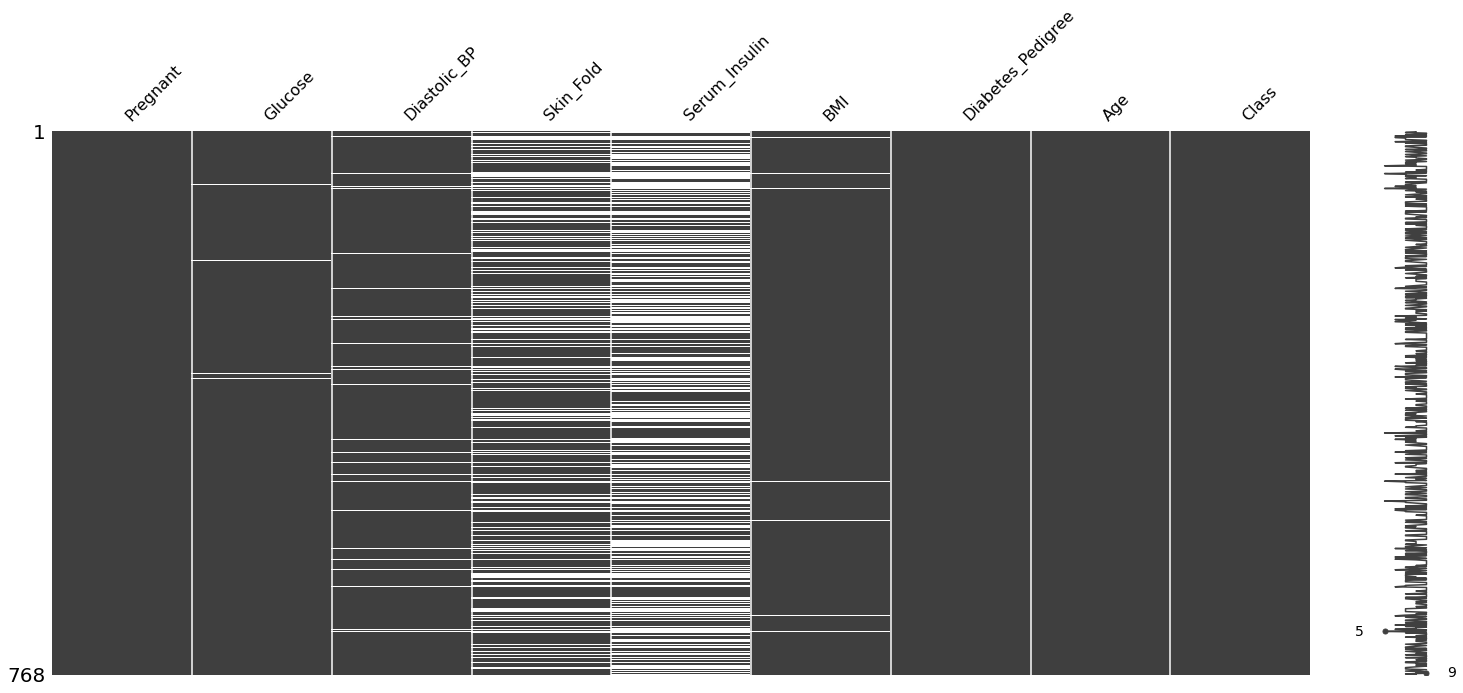

In [7]:
# Guess the missingness type
msno.matrix(diabetes)  
plt.show() # ---> Serum_Insulin is missing at random.

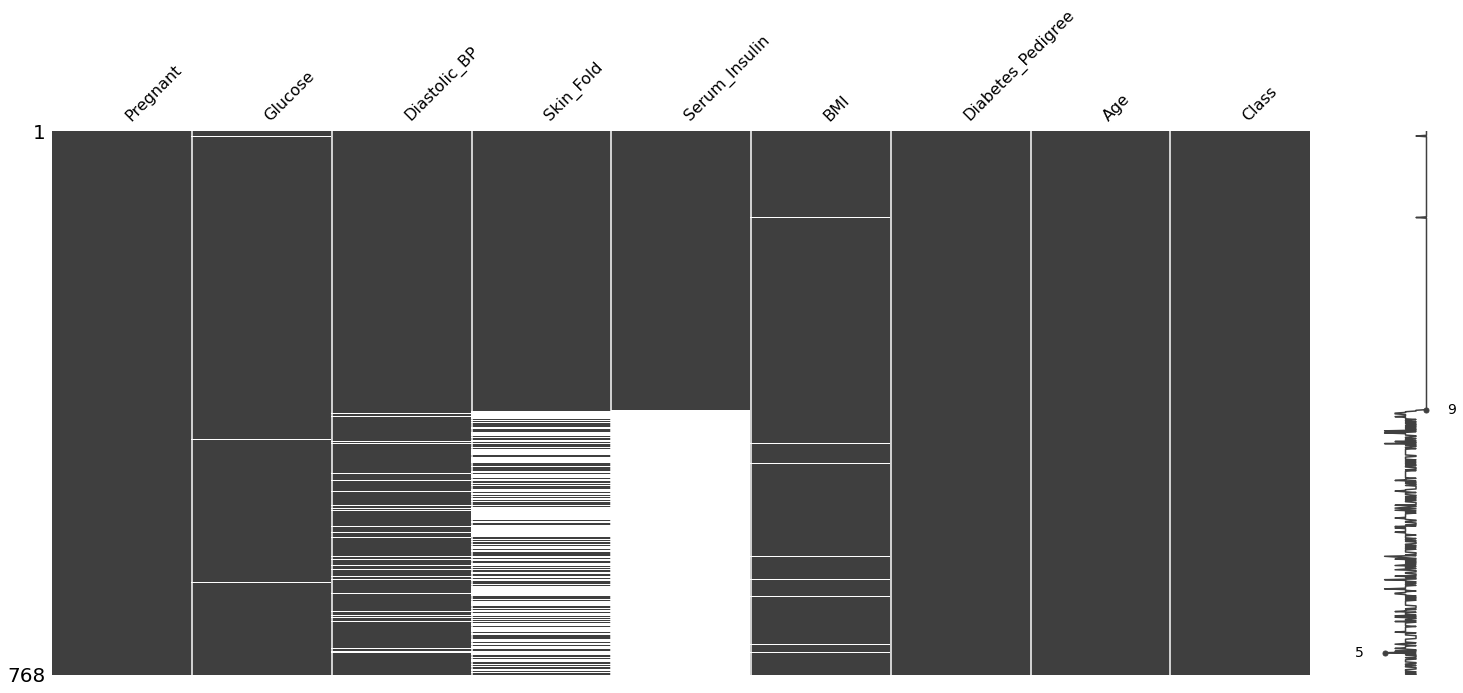

In [8]:
# Sort diabetes dataframe on 'Serum_Insulin'
sorted_values = diabetes.sort_values('Serum_Insulin')
msno.matrix(sorted_values)
plt.show()

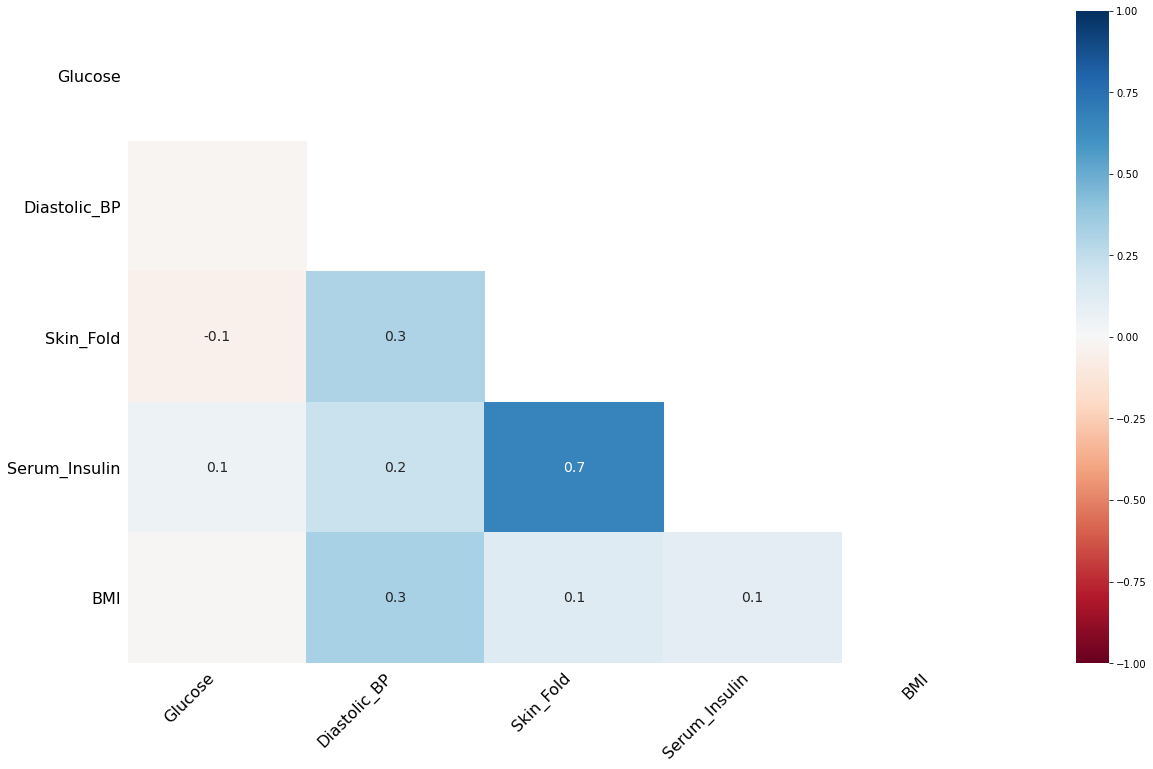

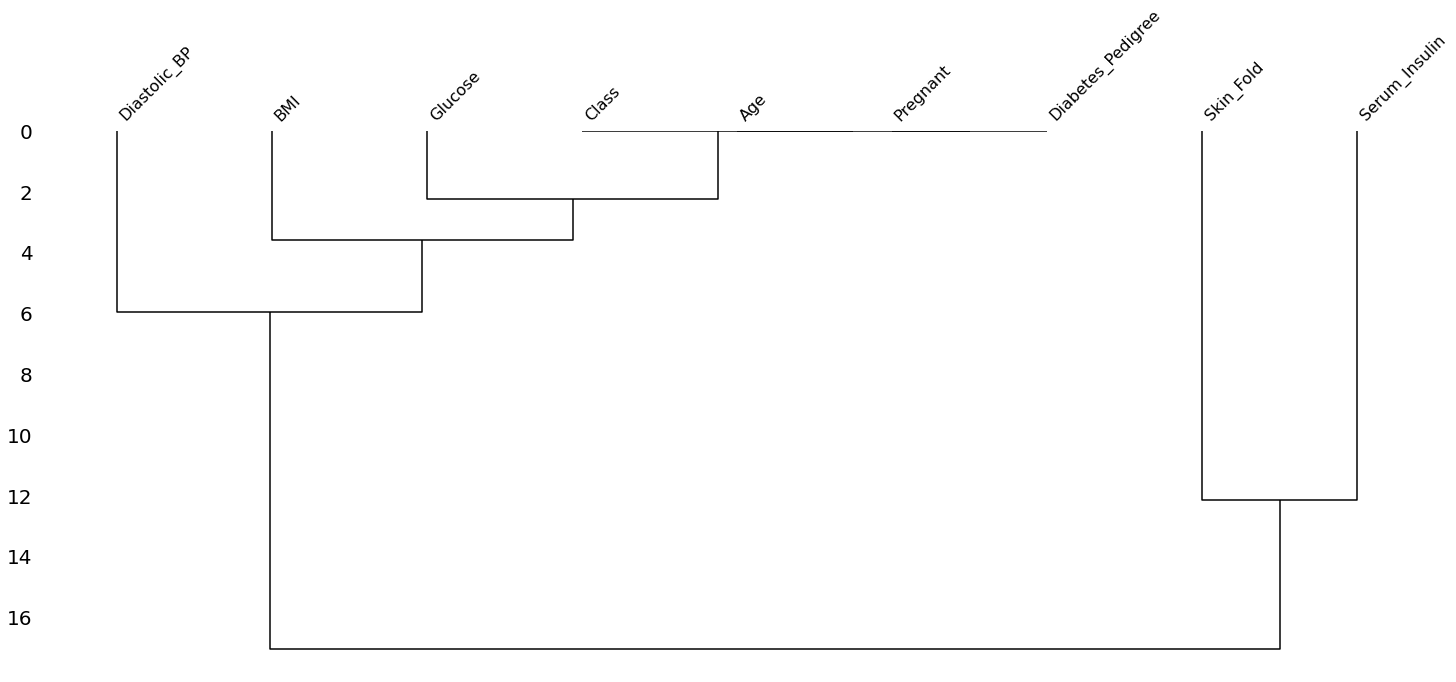

In [9]:
# Finding correlations in your data

# Plot missingness heatmap of diabetes
msno.heatmap(diabetes)
# Plot missingness dendrogram of diabetes
msno.dendrogram(diabetes)
plt.show()

# ---> Skin_Fold is MNAR

In [10]:
# Function for fill dummy values

def fill_dummy_values(df, scaling_factor=0.1):
    df_dummy = df.copy(deep=True)
    for col in df_dummy:
        col = df_dummy[col]
        col_null = col.isnull()
        # Calculate number of missing values in column
        num_nulls = col_null.sum()
        # Calculate column range
        col_range = col.max() - col.min()
        # Scale the random values to scaling_factor times col_range
        dummy_values = (np.random.rand(num_nulls) - 2) * scaling_factor * col_range + col.min()
        col[col_null] = dummy_values

    return df_dummy

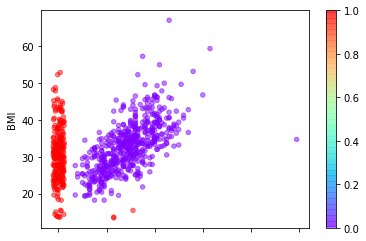

In [11]:
# Generate scatter plot with missingness

# Fill dummy values in diabetes_dummy
diabetes_dummy = fill_dummy_values(diabetes, 0.05)

# Sum the nullity of Skin_Fold and BMI
nullity = diabetes['Skin_Fold'].isnull() + diabetes['BMI'].isnull()

# Create a scatter plot of Skin Fold and BMI
diabetes_dummy.plot(x='Skin_Fold', y='BMI', kind='scatter', alpha=0.5,
                    # Set color to nullity of BMI and Skin_Fold
                    c=nullity,
                    cmap='rainbow')
plt.show()

5


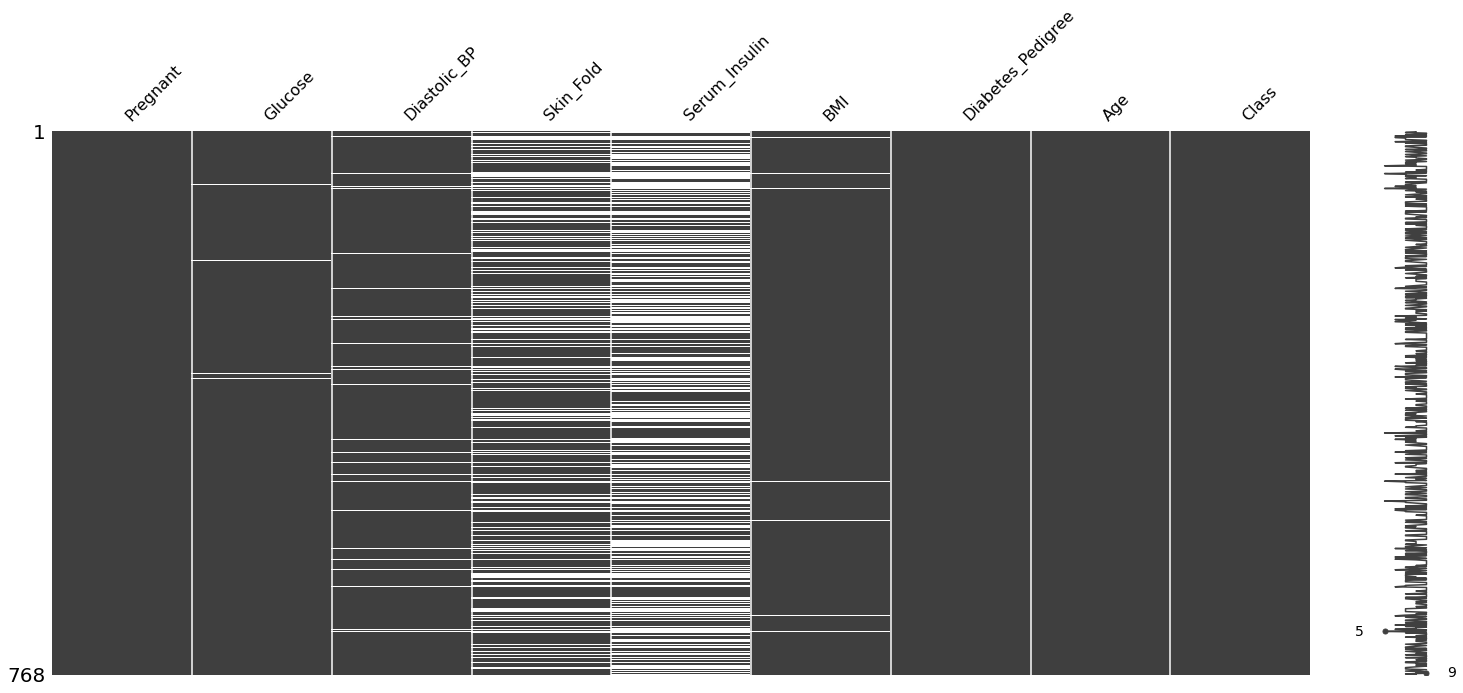

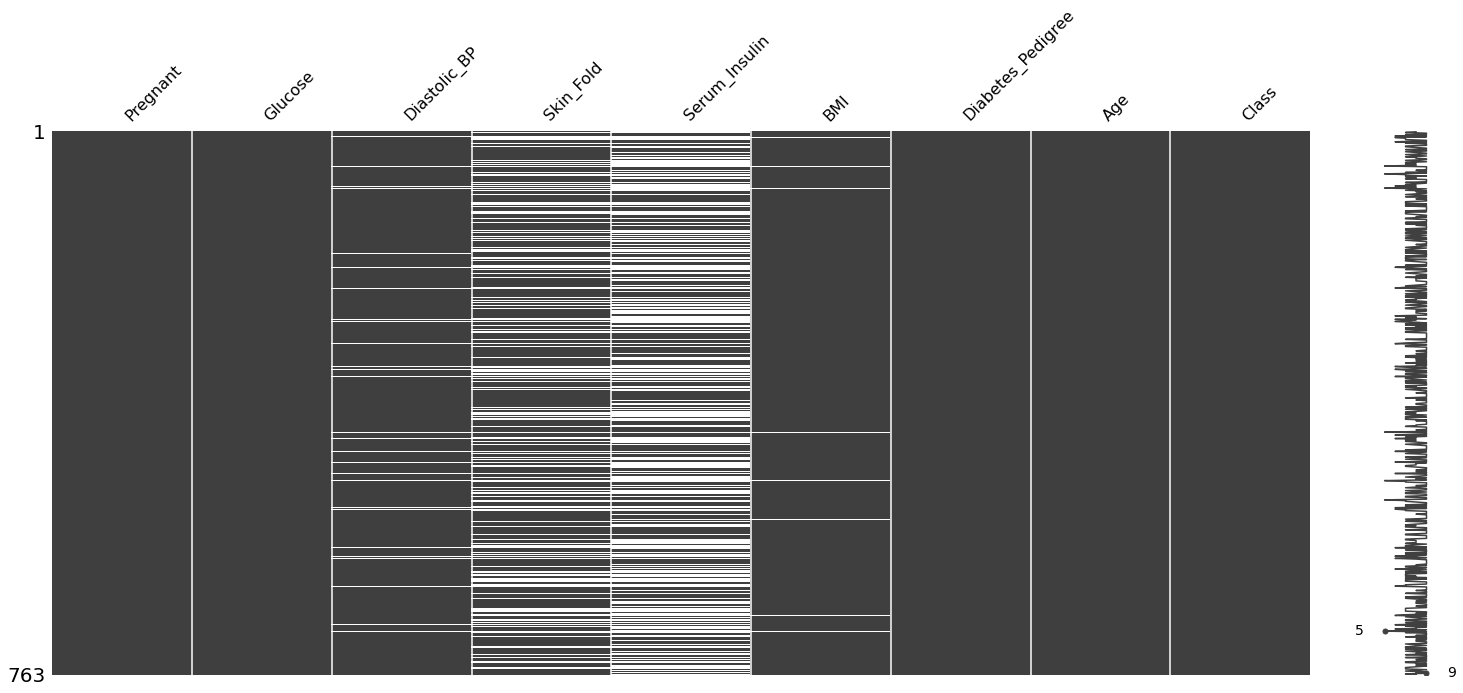

In [12]:
# Delete MCAR

# Visualize the missingness of diabetes pre-dropping missing values
msno.matrix(diabetes)

# Print the number of missing values in Glucose
print(diabetes['Glucose'].isnull().sum())

# Drop all rows where 'Glucose' has a missing value
diabetes.dropna(subset=['Glucose'], how='all', inplace=True)

# Visualize the missingness of diabetes after-dropping missing values
msno.matrix(diabetes)

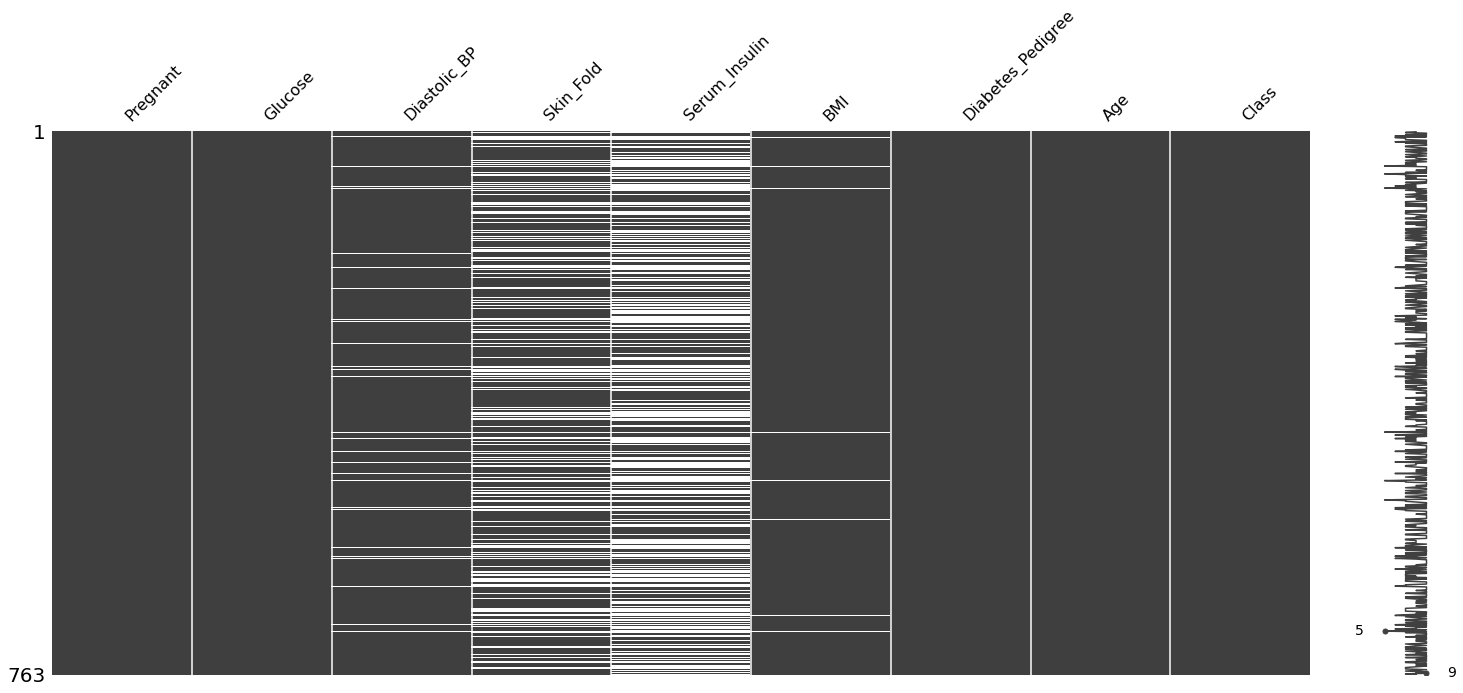

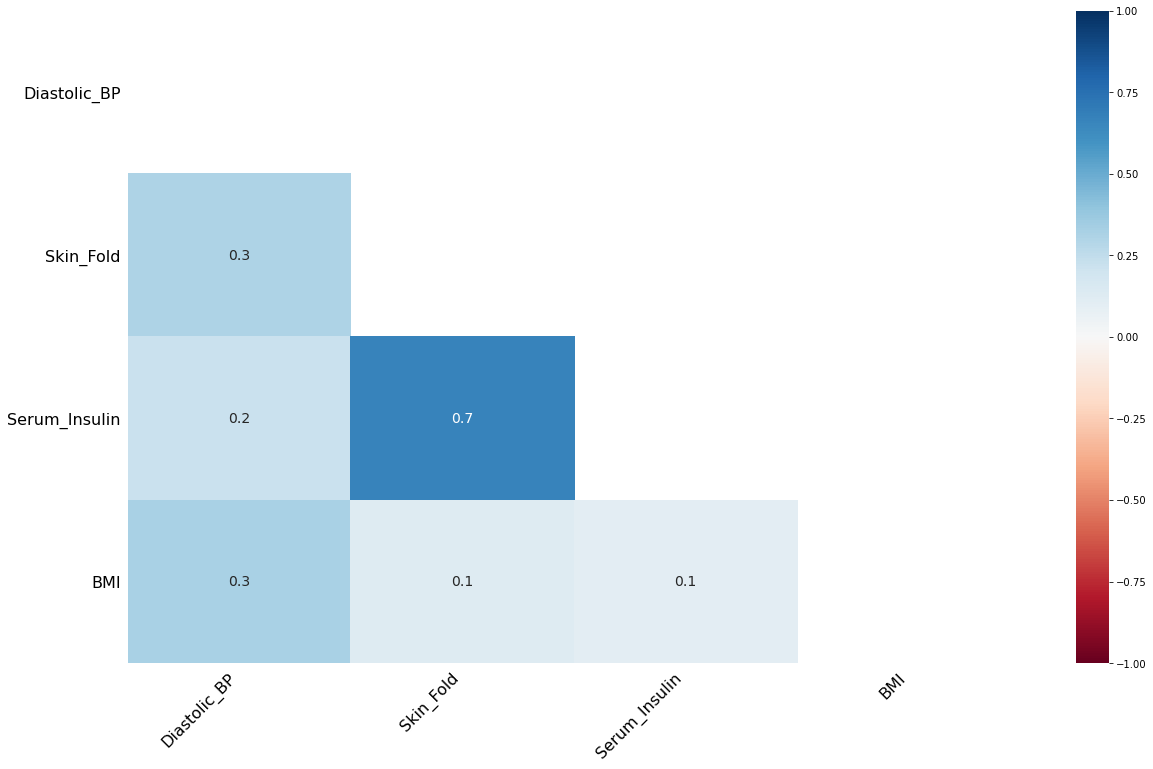

In [13]:
# Will you delete?

# Visualize the missingness in the data
msno.matrix(diabetes)
# Visualize the correlation of missingness between variables
msno.heatmap(diabetes)
plt.show()

# --> BMI values are Missing Completely at Random(MCAR).
#     Therefore, we should delete it.

# Drop rows where 'BMI' has a missing value
diabetes.dropna(subset=['BMI'], how='all', inplace=True)

## 3. Imputation Techniques

In [14]:
from sklearn.impute import SimpleImputer

In [15]:
# Mean & median imputation

mean_imputer = SimpleImputer(strategy='mean')
median_imputer = SimpleImputer(strategy='median')
mode_imputer = SimpleImputer(strategy="most_frequent")
constant_imputer = SimpleImputer(strategy="constant", fill_value=0)

diabetes_mean = diabetes.copy(deep=True)
diabetes_median = diabetes.copy(deep=True)
diabetes_mode = diabetes.copy(deep=True)
diabetes_constant = diabetes.copy(deep=True)

diabetes_mean.iloc[:, :] = mean_imputer.fit_transform(diabetes_mean)
diabetes_median.iloc[:, :] = median_imputer.fit_transform(diabetes_median)
diabetes_mode.iloc[:, :] = mode_imputer.fit_transform(diabetes_mode)
diabetes_constant.iloc[:, :] = mean_imputer.fit_transform(diabetes_constant)

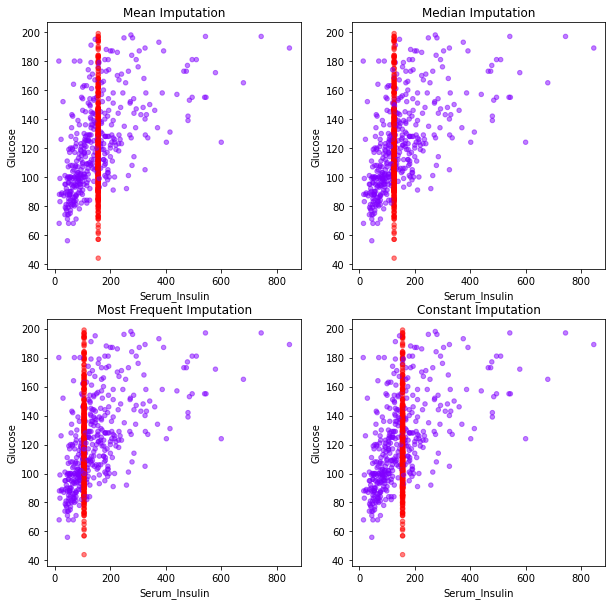

In [16]:
# Visualize imputations

# Set nrows and ncols to 2
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
nullity = diabetes.Serum_Insulin.isnull() + diabetes.Glucose.isnull()

# Create a dictionary of imputations
imputations = {'Mean Imputation': diabetes_mean, 'Median Imputation': diabetes_median,
               'Most Frequent Imputation': diabetes_mode, 'Constant Imputation': diabetes_constant}

# Loop over flattened axes and imputations
for ax, df_key in zip(axes.flatten(), imputations):
    # Select and also set the title for a DataFrame
    imputations[df_key].plot(x='Serum_Insulin', y='Glucose', kind='scatter',
                             alpha=0.5, c=nullity, cmap='rainbow', ax=ax,
                             colorbar=False, title=df_key)
plt.show()

In [17]:
# Filling missing time-series data

# Print prior to imputing missing values
print(airquality[30:40])

# Fill NaNs using forward fill
airquality.fillna(method='ffill', inplace=True)
print(airquality[30:40])

# Fill NaNs using backward fill
airquality.fillna(method='bfill', inplace=True)
print(airquality[30:40])

            Ozone  Solar  Wind  Temp
Date                                
1976-05-31   37.0  279.0   7.4    76
1976-06-01    NaN  286.0   8.6    78
1976-06-02    NaN  287.0   9.7    74
1976-06-03    NaN  242.0  16.1    67
1976-06-04    NaN  186.0   9.2    84
1976-06-05    NaN  220.0   8.6    85
1976-06-06    NaN  264.0  14.3    79
1976-06-07   29.0  127.0   9.7    82
1976-06-08    NaN  273.0   6.9    87
1976-06-09   71.0  291.0  13.8    90
            Ozone  Solar  Wind  Temp
Date                                
1976-05-31   37.0  279.0   7.4    76
1976-06-01   37.0  286.0   8.6    78
1976-06-02   37.0  287.0   9.7    74
1976-06-03   37.0  242.0  16.1    67
1976-06-04   37.0  186.0   9.2    84
1976-06-05   37.0  220.0   8.6    85
1976-06-06   37.0  264.0  14.3    79
1976-06-07   29.0  127.0   9.7    82
1976-06-08   29.0  273.0   6.9    87
1976-06-09   71.0  291.0  13.8    90
            Ozone  Solar  Wind  Temp
Date                                
1976-05-31   37.0  279.0   7.4    76
1

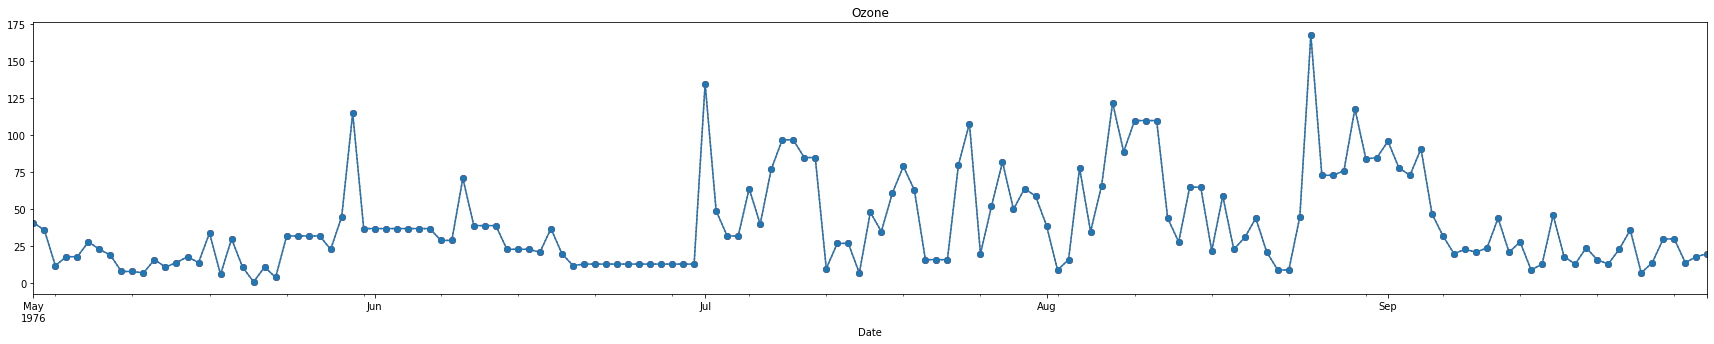

In [18]:
# Visualize forward fill imputation

# Impute airquality DataFrame with ffill method
ffill_imputed = airquality.fillna(method='ffill')

# Plot the imputed DataFrame ffill_imp in red dotted style
ffill_imputed['Ozone'].plot(color='red', marker='o', linestyle='dotted', figsize=(30, 5))

# Plot the airquality DataFrame with title
airquality['Ozone'].plot(title='Ozone', marker='o', figsize=(30, 5))
plt.show()

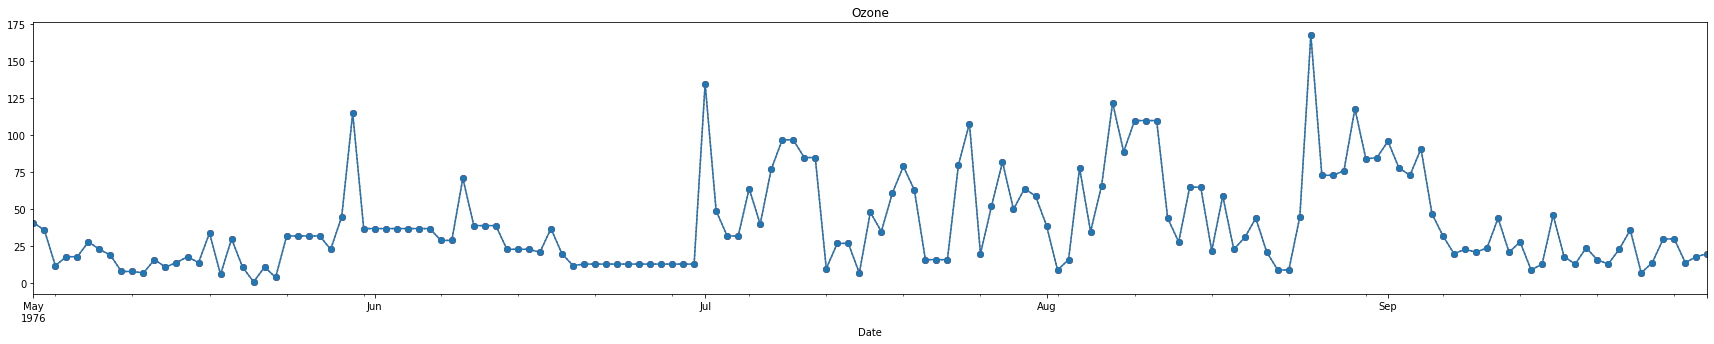

In [19]:
# Visualize backward fill imputation

# Impute airquality DataFrame with bfill method
bfill_imputed = airquality.fillna(method='bfill')

# Plot the imputed DataFrame bfill_imp in red dotted style
bfill_imputed['Ozone'].plot(color='red', marker='o', linestyle='dotted', figsize=(30, 5))

# Plot the airquality DataFrame with title
airquality['Ozone'].plot(title='Ozone', marker='o', figsize=(30, 5))
plt.show()

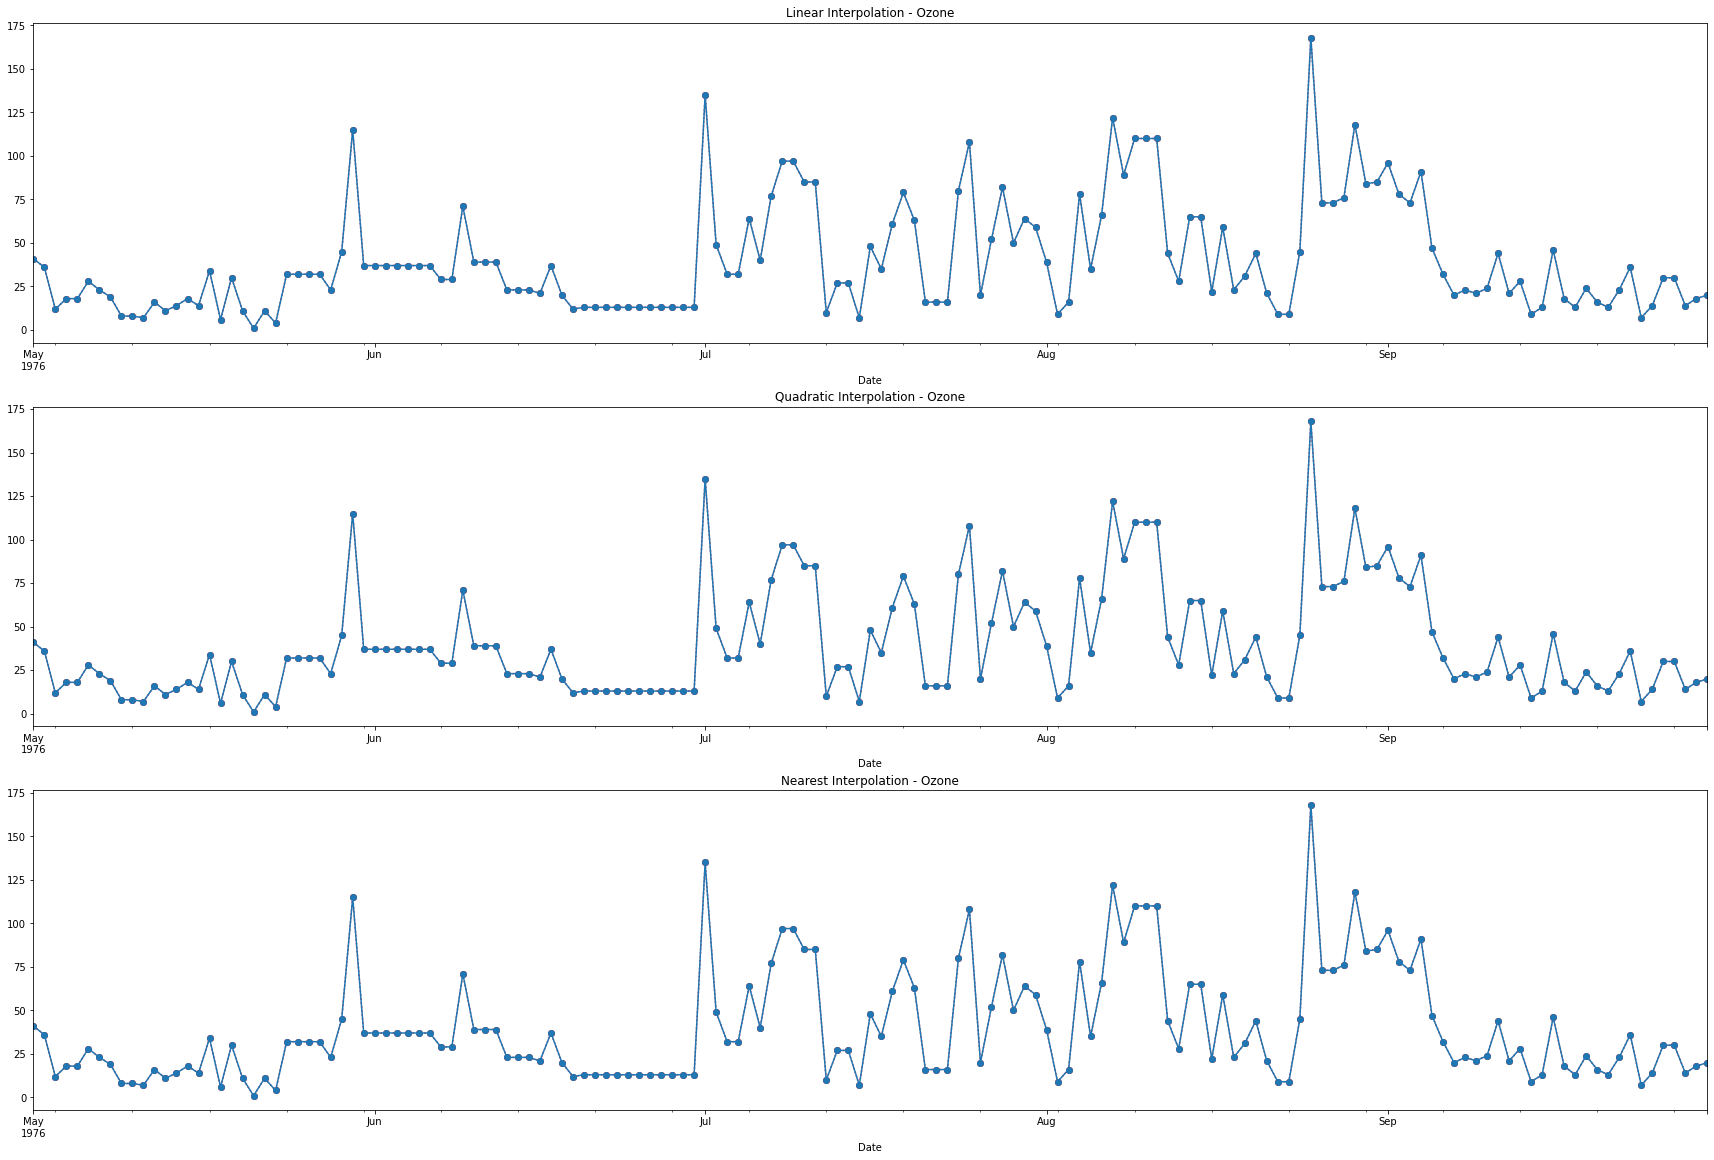

In [20]:
linear = airquality.interpolate(method='linear')
quadratic = airquality.interpolate(method='quadratic')
nearest = airquality.interpolate(method='nearest')

# Plot interpolations

# Set nrows to 3 and ncols to 1
fig, axes = plt.subplots(3, 1, figsize=(30, 20))

# Create a dictionary of interpolations
interpolations = {'Linear Interpolation': linear, 'Quadratic Interpolation': quadratic,
                  'Nearest Interpolation': nearest}

# Loop over axes and interpolations
for ax, df_key in zip(axes, interpolations):
    # Select and also set the title for a DataFrame
    interpolations[df_key].Ozone.plot(color='red', marker='o', linestyle='dotted', ax=ax)
    airquality.Ozone.plot(title=df_key + ' - Ozone', marker='o', ax=ax)

plt.show()

## 4. Advanced Imputation Techniques

```
conda install cvxpy
conda install ecos  
conda install CVXcanon  
pip install fancyimpute
```

In [21]:
from fancyimpute import KNN

Using TensorFlow backend.


In [22]:
# KNN imputation

# Copy diabetes to diabetes_knn_imputed
diabetes_knn_imputed = diabetes.copy(deep=True)

# Initialize KNN
knn_imputer = KNN()

# Impute using fit_tranform on diabetes
diabetes_knn_imputed.iloc[:, :] = knn_imputer.fit_transform(diabetes)

Imputing row 1/751 with 1 missing, elapsed time: 0.077
Imputing row 101/751 with 0 missing, elapsed time: 0.080
Imputing row 201/751 with 2 missing, elapsed time: 0.081
Imputing row 301/751 with 0 missing, elapsed time: 0.083
Imputing row 401/751 with 1 missing, elapsed time: 0.085
Imputing row 501/751 with 2 missing, elapsed time: 0.087
Imputing row 601/751 with 2 missing, elapsed time: 0.088
Imputing row 701/751 with 1 missing, elapsed time: 0.090


In [23]:
# MICE imputation

from fancyimpute import IterativeImputer

# Copy diabetes to diabetes_mice_imputed
diabetes_mice_imputed = diabetes.copy(deep=True)

# Initialize IterativeImputer
mice_imputer = IterativeImputer()

# Impute using fit_tranform on diabetes
diabetes_mice_imputed.iloc[:, :] = mice_imputer.fit_transform(diabetes)

In [24]:
# Imputing categorical values

from sklearn.preprocessing import OrdinalEncoder

# Ordinal encoding of a categorical column
ambience_ord_enc = OrdinalEncoder()

# Select non-null values of ambience column in users
ambience = users['ambience']
ambience_not_null = ambience[ambience.notnull()]

# Reshape ambience_not_null to shape (-1, 1)
reshaped_vals = ambience_not_null.values.reshape(-1, 1)

# Ordinally encode reshaped_vals
encoded_vals = ambience_ord_enc.fit_transform(reshaped_vals)

# Assign back encoded values to non-null values of ambience in users
users.loc[ambience.notnull(), 'ambience'] = np.squeeze(encoded_vals)


NameError: name 'users' is not defined

## To be continue...